In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import pandas as pd
import numpy as np
import time

import keras.utils as ku
import keras.models as km
import keras.layers as kl
import keras.optimizers as ko

from sklearn.metrics import confusion_matrix

# Paramètres
batch_size = 128
epochs = 10
# Vocabulary
# One epoch is when an ENTIRE dataset is passed forward and backward through neural network only once
# Batch_size : total number of training examples present in a single batch. 
# Batch_size : defines the number of samples to work through before updating the internal model parameters
# Batch_size : is the number of samples processed before the model is updated. 



import sys
print(sys.version)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


/usr/local/insa/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8636184722462832741
]


In [2]:
import tensorflow
tensorflow.__version__

'1.8.0'

In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255. # Pour normaliser toutes les valeurs 
x_test = x_test.astype('float32') / 255.# Pour normaliser toutes les valeurs 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
autoencoder = km.Sequential()
autoencoder.add(kl.Dense(32, activation='relu', input_shape=(784,)))
autoencoder.add(kl.Dense(784, activation='sigmoid'))

In [6]:
# apprentissage
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
ts = time.time()
history = autoencoder.fit(x_train, x_train,
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.3717 - acc: 0.7421 - val_loss: 0.2715 - val_acc: 0.7943
Epoch 2/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.2643 - acc: 0.7967 - val_loss: 0.2536 - val_acc: 0.7965
Epoch 3/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2437 - acc: 0.7971 - val_loss: 0.2316 - val_acc: 0.7968
Epoch 4/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.2237 - acc: 0.7974 - val_loss: 0.2138 - val_acc: 0.7976
Epoch 5/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2089 - acc: 0.7981 - val_loss: 0.2016 - val_acc: 0.7983
Epoch 6/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.1984 - acc: 0.7991 - val_loss: 0.1924 - val_acc: 0.7996
Epoch 7/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.1899 - acc: 0.8003 - val_loss: 0.1848 - val_acc

In [7]:
autoencoder_imgs = autoencoder.predict(x_test)

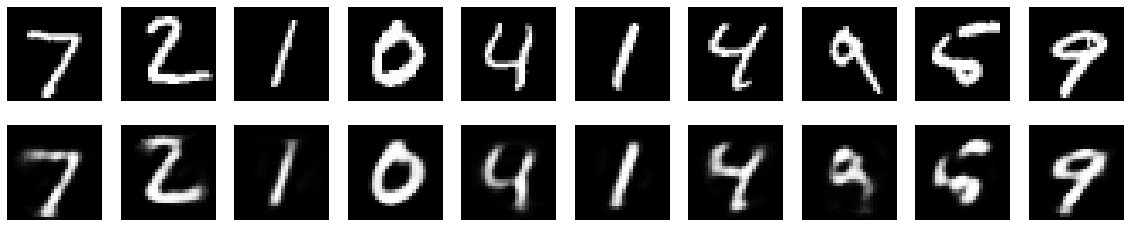

In [8]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
autoencoder.layers


## Autoencoder SPARSE

In [38]:
from keras import regularizers

autoencoder = km.Sequential()
autoencoder.add(kl.Dense(32, activation='relu',activity_regularizer=regularizers.l2(0), input_shape=(784,)))
autoencoder.add(kl.Dense(784, activation='sigmoid'))


In [39]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
ts = time.time()
history = autoencoder.fit(x_train, x_train,
                    batch_size=256,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.3569 - acc: 0.7537 - val_loss: 0.2715 - val_acc: 0.7937
Epoch 2/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.2647 - acc: 0.7977 - val_loss: 0.2544 - val_acc: 0.7983
Epoch 3/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.2442 - acc: 0.7981 - val_loss: 0.2317 - val_acc: 0.7966
Epoch 4/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2232 - acc: 0.7980 - val_loss: 0.2126 - val_acc: 0.7982
Epoch 5/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2071 - acc: 0.7987 - val_loss: 0.1992 - val_acc: 0.7987
Epoch 6/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1958 - acc: 0.7998 - val_loss: 0.1895 - val_acc: 0.7999
Epoch 7/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1873 - acc: 0.8009 - val_loss: 0.1822 - val_acc

In [40]:
autoencoder_imgs = autoencoder.predict(x_test)

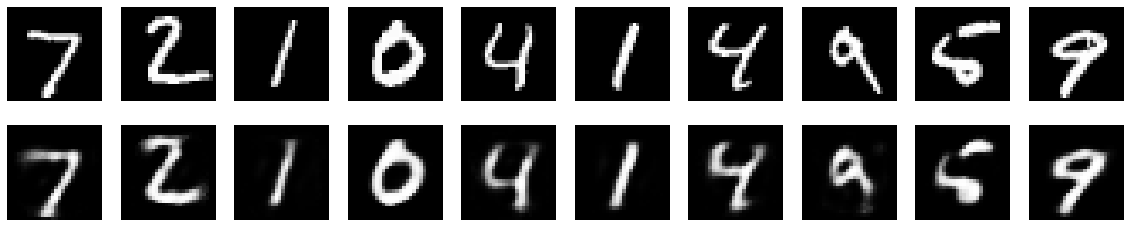

In [41]:


import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

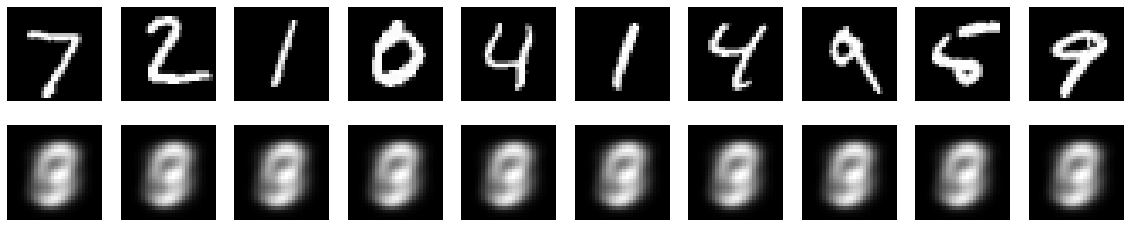

In [27]:


import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [62]:
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

autoencoder = km.Sequential()

autoencoder.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28,28,1) ,activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [63]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 4, 4, 8)           584       
__________

In [65]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [ ]:
#apprentissage
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
ts = time.time()
history = autoencoder.fit(x_train, x_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 50s 828us/step - loss: 0.2129 - acc: 0.7941 - val_loss: 0.1663 - val_acc: 0.8028
Epoch 2/50
60000/60000 [==============================] - 50s 829us/step - loss: 0.1510 - acc: 0.8011 - val_loss: 0.1416 - val_acc: 0.8001
Epoch 3/50
60000/60000 [==============================] - 51s 849us/step - loss: 0.1378 - acc: 0.8045 - val_loss: 0.1328 - val_acc: 0.8078
Epoch 4/50
60000/60000 [==============================] - 50s 842us/step - loss: 0.1309 - acc: 0.8062 - val_loss: 0.1300 - val_acc: 0.8090
Epoch 5/50
60000/60000 [==============================] - 50s 840us/step - loss: 0.1262 - acc: 0.8072 - val_loss: 0.1229 - val_acc: 0.8093
Epoch 6/50
60000/60000 [==============================] - 52s 859us/step - loss: 0.1231 - acc: 0.8080 - val_loss: 0.1195 - val_acc: 0.8098
Epoch 7/50
60000/60000 [==============================] - 51s 851us/step - loss: 0.1207 - acc: 0.8085 - val_loss: 0.